In [3]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 02-Tensor Basics


In [4]:
x = torch.empty(4)
y = torch.empty(3,4)

In [5]:
torch.rand(3,4)

tensor([[0.7295, 0.8119, 0.7569, 0.7379],
        [0.0280, 0.3369, 0.3958, 0.6021],
        [0.8266, 0.4694, 0.5044, 0.5797]])

In [6]:
torch.zeros(4,5, dtype = torch.int32)

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [7]:
torch.ones(3, dtype = torch.int32)

tensor([1, 1, 1], dtype=torch.int32)

In [8]:
x.dtype
y.size()

torch.Size([3, 4])

In [9]:
torch.tensor([[1,2,3],[4,5,6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

In [10]:
y.add_(x) #inplace operations: "_" when trailing underscore\
y.mul_(x)

tensor([[inf, 0., inf, 0.],
        [inf, 0., inf, 0.],
        [inf, 0., inf, 0.]])

In [11]:
x = torch.rand(4,4)
y = x.view(8,2) #reshaping
y

#if we don't know either dimensions, use -1
y = x.view(-1,2)
y #pytorch will automatically detect the missing number

tensor([[0.7953, 0.0165],
        [0.4124, 0.8986],
        [0.7960, 0.1049],
        [0.0662, 0.8080],
        [0.9698, 0.8396],
        [0.0458, 0.0775],
        [0.4117, 0.0309],
        [0.0795, 0.4769]])

In [12]:
#torch to numpy
a = torch.ones(5)
b = a.numpy()
b
#remember, if we have it on GPU, both point to same memory location, so if one changed, other also changed

array([1., 1., 1., 1., 1.], dtype=float32)

In [13]:
a+=1
b

array([2., 2., 2., 2., 2.], dtype=float32)

In [14]:
#numpy to torch
a = np.ones(5)
b = torch.from_numpy(a)
print(b)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [15]:
a+=1
b

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

In [16]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

    

In [17]:
a = torch.ones(5).to(device)
b = a.numpy()
a+=1
a


tensor([2., 2., 2., 2., 2.])

## 03-Autograd


In [18]:
x = torch.randn(3,4, requires_grad = True)
x

tensor([[ 1.6160,  0.1449, -0.7004, -0.1477],
        [ 0.9502,  0.4202,  0.1834,  1.3616],
        [ 0.1769,  1.9284,  0.4201, -0.9270]], requires_grad=True)

In [19]:
y = x+2
y

tensor([[3.6160, 2.1449, 1.2996, 1.8523],
        [2.9502, 2.4202, 2.1834, 3.3616],
        [2.1769, 3.9284, 2.4201, 1.0730]], grad_fn=<AddBackward0>)

In [20]:
z = y*y*2
# z = z.mean()
z

tensor([[26.1509,  9.2013,  3.3778,  6.8621],
        [17.4079, 11.7144,  9.5342, 22.6003],
        [ 9.4779, 30.8648, 11.7134,  2.3027]], grad_fn=<MulBackward0>)

In [21]:
x.grad

In [22]:
#what if we don't do z.mean(), i.e. don't wanna convert vectors to a scalar, as grad is given only to scalar outputs
v = torch.tensor([[0.1, 0.001, 1, 0.1],[0.2, 2,0.002, 0.2], [0.1, 0.001, 0.1, 1]])
z.backward(v)
x.grad

tensor([[1.4464e+00, 8.5796e-03, 5.1983e+00, 7.4092e-01],
        [2.3602e+00, 1.9361e+01, 1.7467e-02, 2.6893e+00],
        [8.7076e-01, 1.5714e-02, 9.6803e-01, 4.2920e+00]])

#### Gradient Tracking prevention


In [23]:
#1.
x.requires_grad_(False)

tensor([[ 1.6160,  0.1449, -0.7004, -0.1477],
        [ 0.9502,  0.4202,  0.1834,  1.3616],
        [ 0.1769,  1.9284,  0.4201, -0.9270]])

In [24]:
#2.
x.detach()

tensor([[ 1.6160,  0.1449, -0.7004, -0.1477],
        [ 0.9502,  0.4202,  0.1834,  1.3616],
        [ 0.1769,  1.9284,  0.4201, -0.9270]])

In [25]:
#3.
with torch.no_grad():
    y = x+2
y

tensor([[3.6160, 2.1449, 1.2996, 1.8523],
        [2.9502, 2.4202, 2.1834, 3.3616],
        [2.1769, 3.9284, 2.4201, 1.0730]])

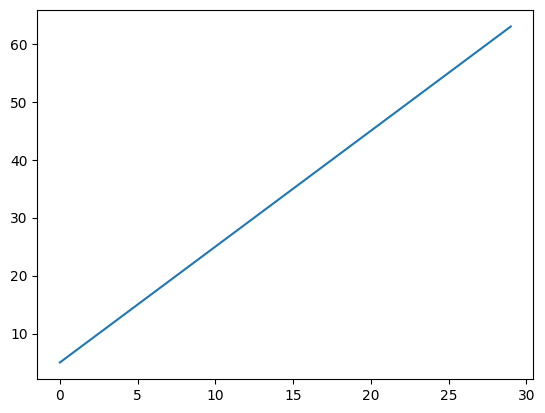

In [26]:
x = torch.arange(30, dtype = torch.int32).reshape(3,10)
Y = 2*x + 5
x_coord = x.flatten().numpy()
Y_coord = Y.flatten().numpy()
plt.plot(x_coord, Y_coord)

In [27]:
w = torch.rand(1,requires_grad = True)
b = torch.rand(1, requires_grad = True)

lr = 0.001
epochs = 200
for epoch in range(epochs):
    y = w*x + b
    loss = ((y-Y)**2).mean()
    loss.backward()

    with torch.no_grad():
        w -= lr*w.grad
        b -= lr*b.grad

        w.grad.zero_()
        b.grad.zero_()
    if epoch%10 == 0:
        print(f"Epoch {epoch}:  Loss = {loss.item()}, w = {w.item()} ,b = {b.item()}")

Epoch 0:  Loss = 909.8840942382812, w = 1.4489853382110596 ,b = 0.8352769613265991
Epoch 10:  Loss = 4.430405139923096, w = 2.208733558654785 ,b = 0.8955716490745544
Epoch 20:  Loss = 4.384161472320557, w = 2.207798957824707 ,b = 0.9170390367507935
Epoch 30:  Loss = 4.338437557220459, w = 2.2067127227783203 ,b = 0.938386082649231
Epoch 40:  Loss = 4.293191432952881, w = 2.205631971359253 ,b = 0.9596215486526489
Epoch 50:  Loss = 4.248415470123291, w = 2.204556941986084 ,b = 0.9807459712028503
Epoch 60:  Loss = 4.204106330871582, w = 2.2034873962402344 ,b = 1.0017598867416382
Epoch 70:  Loss = 4.160261631011963, w = 2.202423334121704 ,b = 1.022663950920105
Epoch 80:  Loss = 4.116873741149902, w = 2.2013649940490723 ,b = 1.0434588193893433
Epoch 90:  Loss = 4.073936939239502, w = 2.200312376022339 ,b = 1.0641449689865112
Epoch 100:  Loss = 4.031446933746338, w = 2.1992650032043457 ,b = 1.084722876548767
Epoch 110:  Loss = 3.9894025325775146, w = 2.198223114013672 ,b = 1.1051928997039795


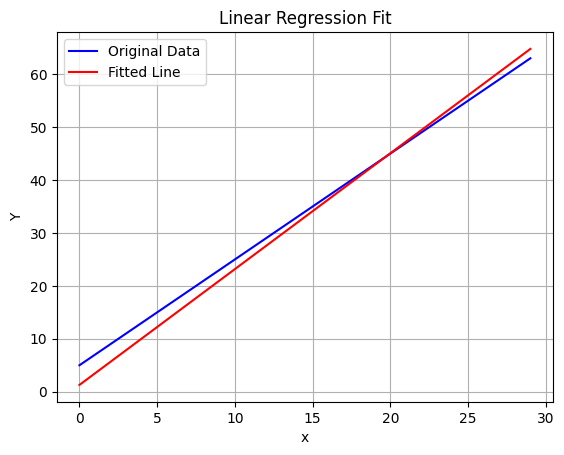

In [28]:
x_flat = x.flatten().detach().numpy()
Y_flat = Y.flatten().detach().numpy()
y_fit = (w * x + b).flatten().detach().numpy()

plt.plot(x_flat, Y_flat, label='Original Data', color='blue')
plt.plot(x_flat, y_fit, label='Fitted Line', color='red')
plt.xlabel('x')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression Fit')
plt.grid(True)
plt.show()


## 04-Backpropagation

In [29]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad = True)

y_hat = w*x
loss = (y_hat - y)**2
print(loss)

loss.backward()
w.grad

tensor(1., grad_fn=<PowBackward0>)


tensor(-2.)

## 05-Gradient Descent using AutoGrad

In [39]:
x = torch.tensor([1,2,3,4,5])
y = torch.tensor([3,6,9,12,15])

w = torch.rand(1, requires_grad = True)

epochs = 500
lr = 0.001
for epoch in range(epochs):
    y_pred = w*x
    loss = ((y-y_pred)**2).mean()

    loss.backward()
    with torch.no_grad():
        w -= lr*w.grad
        w.grad.zero_()

    if epoch%10 == 0:
        print(f"Epoch: {epoch} Loss: {loss.item()}, w: {w.item()} ")

Epoch: 0 Loss: 75.80258178710938, w: 0.4326533079147339 
Epoch: 10 Loss: 48.58040237426758, w: 0.9447101950645447 
Epoch: 20 Loss: 31.134231567382812, w: 1.3546375036239624 
Epoch: 30 Loss: 19.953325271606445, w: 1.682804822921753 
Epoch: 40 Loss: 12.787698745727539, w: 1.9455190896987915 
Epoch: 50 Loss: 8.19538688659668, w: 2.1558351516723633 
Epoch: 60 Loss: 5.252268314361572, w: 2.3242034912109375 
Epoch: 70 Loss: 3.366074323654175, w: 2.458991050720215 
Epoch: 80 Loss: 2.157252788543701, w: 2.5668952465057373 
Epoch: 90 Loss: 1.3825383186340332, w: 2.653278112411499 
Epoch: 100 Loss: 0.8860419392585754, w: 2.7224318981170654 
Epoch: 110 Loss: 0.5678468942642212, w: 2.7777926921844482 
Epoch: 120 Loss: 0.3639238178730011, w: 2.8221116065979004 
Epoch: 130 Loss: 0.23323066532611847, w: 2.8575916290283203 
Epoch: 140 Loss: 0.14947298169136047, w: 2.8859949111938477 
Epoch: 150 Loss: 0.09579463303089142, w: 2.9087331295013428 
Epoch: 160 Loss: 0.061392925679683685, w: 2.92693638801574

In [44]:
y = 6*w
y.item()

17.999767303466797